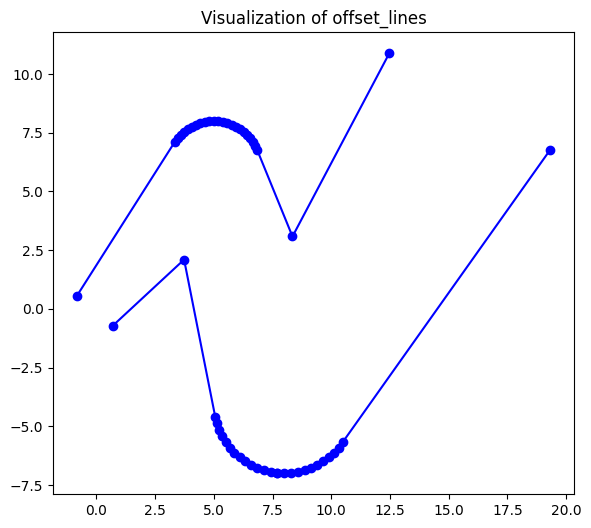

In [2]:
import shapely

line = shapely.LineString([(0,0), (5, 6), (8, -4), (16, 9)])
buffer_sizes = [1, 2, 3, 4]

points = [shapely.Point(coords) for coords in line.coords]

buffered_points = [
   point.buffer(s) for s, point in zip(buffer_sizes, points)
]

convex_hulls = []
for i in range(len(buffered_points)-1):
    convex_hulls.append(
        shapely.convex_hull(
            shapely.union(
                buffered_points[i], 
                buffered_points[i+1]
            )
        )
    )

buffered_line = shapely.union_all(convex_hulls)

offset_lines = shapely.difference(
    shapely.difference(buffered_line.exterior, buffered_points[0]),
    buffered_points[-1]
)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for geom in offset_lines.geoms:
    xs, ys = geom.xy
    plt.plot(xs, ys, marker='o', linestyle='-', color='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Visualization of offset_lines")
plt.show()